In [1]:
import tensorflow as tf
slim  = tf.contrib.slim
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from nets import inception
from preprocessing import inception_preprocessing
import os
from urllib.request import urlopen
from datasets import imagenet



In [3]:
print (inception.inception_v4.default_image_size)
image_size = inception.inception_v4.default_image_size
checkpoints_dir = '/home/mayoor/dev/ml_tensor/inception'

299


(1, 299, 299, 3)


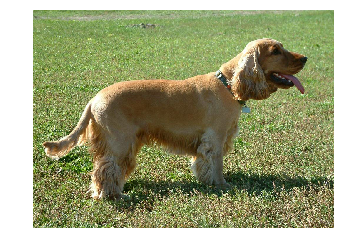

Probability 62.55% => [cocker spaniel, English cocker spaniel, cocker]
Probability 14.33% => [Sussex spaniel]
Probability 1.66% => [clumber, clumber spaniel]
Probability 0.78% => [Irish setter, red setter]
Probability 0.67% => [golden retriever]


In [4]:
with tf.Graph().as_default():
    url = 'https://upload.wikimedia.org/wikipedia/commons/7/70/EnglishCockerSpaniel_simon.jpg'
    image_string = urlopen(url).read()
    image = tf.image.decode_jpeg(image_string, channels=3)
    processed_image = inception_preprocessing.preprocess_image(image, image_size, image_size, is_training=False)
    processed_images  = tf.expand_dims(processed_image, 0)
    
    print(processed_images.get_shape())
    # Create the model, use the default arg scope to configure the batch norm parameters.
    with slim.arg_scope(inception.inception_v4_arg_scope()):
        logits, _ = inception.inception_v4(processed_images, num_classes=1001, is_training=False)
    probabilities = tf.nn.softmax(logits)
    
    init_fn, init_dict = slim.assign_from_checkpoint(
        os.path.join(checkpoints_dir, 'inception_v4.ckpt'),
        slim.get_model_variables('InceptionV4'))

    with tf.Session() as sess:
        sess.run(init_fn,init_dict)
        np_image, probabilities = sess.run([image, probabilities])
        probabilities = probabilities[0, 0:]
        sorted_inds = [i[0] for i in sorted(enumerate(-probabilities), key=lambda x:x[1])]
        
    plt.figure()
    plt.imshow(np_image.astype(np.uint8))
    plt.axis('off')
    plt.show()

    names = imagenet.create_readable_names_for_imagenet_labels()
    for i in range(5):
        index = sorted_inds[i]
        print('Probability %0.2f%% => [%s]' % (probabilities[index] * 100, names[index]))